In [45]:
from melee_dataset import MeleeDataset
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from tqdm import tqdm
import torch
from torch.distributions import Categorical
from torch.distributions import Bernoulli,Normal
import matplotlib.pyplot as plt
from PolicyNet import PolicyNet
import torch.nn.functional as F
from Agents.BCAgent import BCAgent

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [46]:
# train_dataset = MeleeDataset(data_path="data/train_mini_515")
train_dataset = MeleeDataset(data_path="data/train_mini_40")
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)

val_dataset = MeleeDataset(data_path="data/val_mini_10")
val_loader = DataLoader(val_dataset, batch_size=128, shuffle=True)


In [47]:
print(f"obs_dim: {train_dataset[0][0].shape}")
print(f"act_dim: {train_dataset[0][1].shape}")

obs_dim: torch.Size([70])
act_dim: torch.Size([17])


In [56]:
from Agents.BCAgent import BCAgent

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")
obs_dim = train_dataset[0][0].shape[0]
act_dim = train_dataset[0][1].shape[0]
policy  = PolicyNet(obs_dim, act_dim).to(device)
# opt     = optim.Adam(policy.parameters(), lr=1e-3)
agent = BCAgent(obs_dim, act_dim, device)

losses = []
val_losses = []
for epoch in range(10):
    total_loss = 0.0
    for i, (states, actions, next_states) in tqdm(enumerate(train_loader)):
        states = states.to(device)       # [B, obs_dim]
        actions = actions.to(device)     # [B] integers in [0…act_dim-1]
        next_states = next_states.to(device)

        loss = agent.train(states, actions, next_states)


        total_loss += loss * states.shape[0]
    avg_loss = total_loss / len(train_dataset)
    losses.append(avg_loss)
    print(f"Epoch {epoch+1} — Loss: {avg_loss:.4f}")

    val_loss = 0.0  
    for i, (states, actions, next_states) in tqdm(enumerate(val_loader)):
        states = states.to(device)       # [B, obs_dim]
        actions = actions.to(device)     # [B] integers in [0…act_dim-1]
        next_states = next_states.to(device)

        val_loss += agent.validate(states, actions)
    avg_val_loss = val_loss / len(val_dataset)
    val_losses.append(avg_val_loss)
    print(f"Epoch {epoch+1} — Val Loss: {avg_val_loss:.4f}")


Using device: cuda


0it [00:00, ?it/s]

3303it [00:10, 309.71it/s]


Epoch 1 — Loss: -2.7525


864it [00:01, 851.72it/s]


Epoch 1 — Val Loss: -12.2256


3303it [00:10, 319.79it/s]


Epoch 2 — Loss: -17.0331


864it [00:01, 848.18it/s]


Epoch 2 — Val Loss: -21.3773


3303it [00:10, 305.64it/s]


Epoch 3 — Loss: -21.3687


864it [00:01, 842.39it/s]


Epoch 3 — Val Loss: -21.5080


3303it [00:10, 324.96it/s]


Epoch 4 — Loss: -21.6773


864it [00:01, 863.15it/s]


Epoch 4 — Val Loss: -21.5534


3303it [00:10, 315.01it/s]


Epoch 5 — Loss: -21.9346


864it [00:01, 857.38it/s]


Epoch 5 — Val Loss: -21.4573


3303it [00:10, 317.43it/s]


Epoch 6 — Loss: -22.1781


864it [00:01, 863.81it/s]


Epoch 6 — Val Loss: -21.3327


3303it [00:10, 314.30it/s]


Epoch 7 — Loss: -22.3915


864it [00:01, 862.68it/s]


Epoch 7 — Val Loss: -21.2993


3303it [00:10, 308.50it/s]


Epoch 8 — Loss: -22.5891


864it [00:01, 855.25it/s]


Epoch 8 — Val Loss: -21.2570


3303it [00:10, 314.02it/s]


Epoch 9 — Loss: -22.7710


864it [00:01, 863.01it/s]


Epoch 9 — Val Loss: -21.2087


3303it [00:10, 307.59it/s]


Epoch 10 — Loss: -22.9468


864it [00:01, 858.48it/s]

Epoch 10 — Val Loss: -20.9246


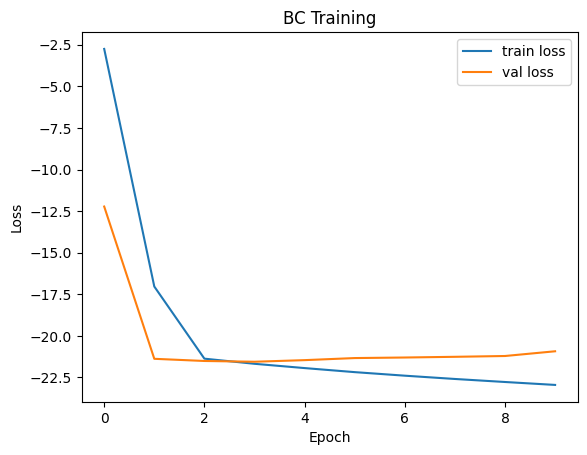

In [57]:
import matplotlib.pyplot as plt

plt.figure()
plt.title("BC Training")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(losses, label="train loss")
plt.plot(val_losses, label="val loss")
plt.legend()
plt.show()



In [58]:
# Save the trained model
torch.save(policy.state_dict(), "bc_40_train_same_logstd.pth")
print("Model saved to trained_policy.pth")


Model saved to trained_policy.pth
